### Import Provider of Services file
Separate notebook due to large size of POS 

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pos = pd.read_csv('POS_OTHER_DEC17.csv',dtype=object)
pos.shape

(144110, 473)

In [3]:
with open('hosp.pickle','rb') as read_file:
    hosp = pickle.load(read_file)

In [4]:
for col in pos.columns:
    print(col)

PRVDR_CTGRY_SBTYP_CD
PRVDR_CTGRY_CD
CHOW_CNT
CHOW_DT
CITY_NAME
ACPTBL_POC_SW
CMPLNC_STUS_CD
SSA_CNTY_CD
CROSS_REF_PROVIDER_NUMBER
CRTFCTN_DT
ELGBLTY_SW
FAC_NAME
INTRMDRY_CARR_CD
MDCD_VNDR_NUM
ORGNL_PRTCPTN_DT
CHOW_PRIOR_DT
INTRMDRY_CARR_PRIOR_CD
PRVDR_NUM
RGN_CD
SKLTN_REC_SW
STATE_CD
SSA_STATE_CD
STATE_RGN_CD
ST_ADR
PHNE_NUM
PGM_TRMNTN_CD
TRMNTN_EXPRTN_DT
CRTFCTN_ACTN_TYPE_CD
GNRL_CNTL_TYPE_CD
ZIP_CD
FIPS_STATE_CD
FIPS_CNTY_CD
CBSA_URBN_RRL_IND
CBSA_CD
ACRDTN_EFCTV_DT
ACRDTN_EXPRTN_DT
ACRDTN_TYPE_CD
TOT_AFLTD_AMBLNC_SRVC_CNT
TOT_AFLTD_ASC_CNT
TOT_COLCTD_HOSP_CNT
TOT_AFLTD_ESRD_CNT
TOT_AFLTD_FQHC_CNT
TOT_AFLTD_HHA_CNT
TOT_AFLTD_HOSPC_CNT
TOT_AFLTD_OPO_CNT
TOT_AFLTD_PRTF_CNT
TOT_AFLTD_RHC_CNT
TOT_AFLTD_SNF_CNT
AFLTD_PRVDR_CNT
RSDNT_PGM_ALPTHC_SW
RSDNT_PGM_DNTL_SW
RSDNT_PGM_OSTPTHC_SW
RSDNT_PGM_OTHR_SW
RSDNT_PGM_PDTRC_SW
LAB_SRVC_CD
PHRMCY_SRVC_CD
RDLGY_SRVC_CD
ASC_BGN_SRVC_DT
FREESTNDNG_ASC_SW
OVRRD_BED_CNT_SW
CRTFD_BED_CNT
ICFIID_BED_CNT
MDCD_NF_BED_CNT
MDCR_SNF_BED_CNT
MDCR_MDCD_SNF_BE

In [5]:
# pos['PRVDR_NUM'].value_counts()
pos['CBSA_URBN_RRL_IND'].value_counts()

U    105429
R     38106
Name: CBSA_URBN_RRL_IND, dtype: int64

In [6]:
# hosp.info()

In [7]:
pos2 = pos.merge(hosp,right_on='provider_id',left_on='PRVDR_NUM',how='inner')

In [8]:
pos2.shape

(2320, 516)

In [9]:
# bed count, urban/rural indicator, # of affiliated providers, medical school affiliation
# physician, PA, phys residents, RN, nurse practitioner
pos2 = pos2.loc[:,['provider_id',
                   'CRTFD_BED_CNT','CBSA_URBN_RRL_IND','AFLTD_PRVDR_CNT','MDCL_SCHL_AFLTN_CD',
                   'PHYSN_CNT','PHYSN_ASTNT_CNT','RSDNT_PHYSN_CNT','RN_CNT','NRS_PRCTNR_CNT']]

num_cols = ['CRTFD_BED_CNT','PHYSN_CNT','PHYSN_ASTNT_CNT','RSDNT_PHYSN_CNT','RN_CNT','NRS_PRCTNR_CNT']
for cols in num_cols:
    pos2[cols] = pos2[cols].astype(float)
pos2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2320 entries, 0 to 2319
Data columns (total 10 columns):
provider_id           2320 non-null object
CRTFD_BED_CNT         2320 non-null float64
CBSA_URBN_RRL_IND     2320 non-null object
AFLTD_PRVDR_CNT       2320 non-null object
MDCL_SCHL_AFLTN_CD    2320 non-null object
PHYSN_CNT             2320 non-null float64
PHYSN_ASTNT_CNT       2320 non-null float64
RSDNT_PHYSN_CNT       2320 non-null float64
RN_CNT                2320 non-null float64
NRS_PRCTNR_CNT        2320 non-null float64
dtypes: float64(6), object(4)
memory usage: 199.4+ KB


## EDA

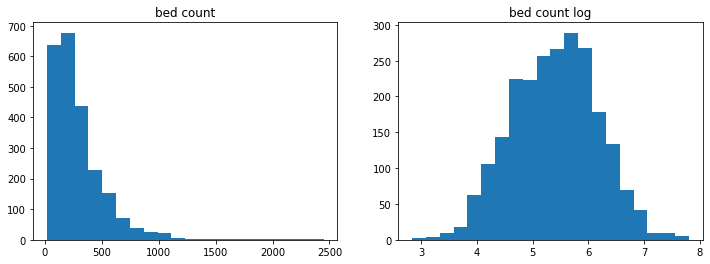

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.hist(pos2['CRTFD_BED_CNT'],bins=20);
ax1.set_title('bed count')
ax2.hist(np.log(pos2['CRTFD_BED_CNT']),bins=20)
ax2.set_title('bed count log');

Lambda: 0.025721469234895596


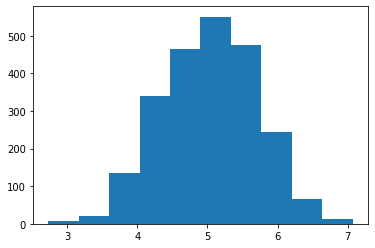

In [11]:
#boxcox transformation
import scipy.stats as stats
lamb=stats.boxcox_normmax(pos2['CRTFD_BED_CNT'], brack=(-1.9, 1.9)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb)
y_t=(np.power(pos2['CRTFD_BED_CNT'],-lamb)-1)/-lamb

plt.hist(y_t);

In [12]:
pos2['CBSA_URBN_RRL_IND'].value_counts()

U    1854
R     466
Name: CBSA_URBN_RRL_IND, dtype: int64

In [13]:
pos2['MDCL_SCHL_AFLTN_CD'].value_counts()

4    1386
2     456
1     368
3     110
Name: MDCL_SCHL_AFLTN_CD, dtype: int64

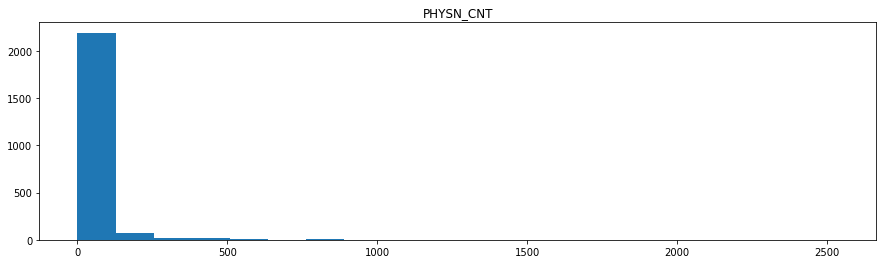

0.0 2538.0


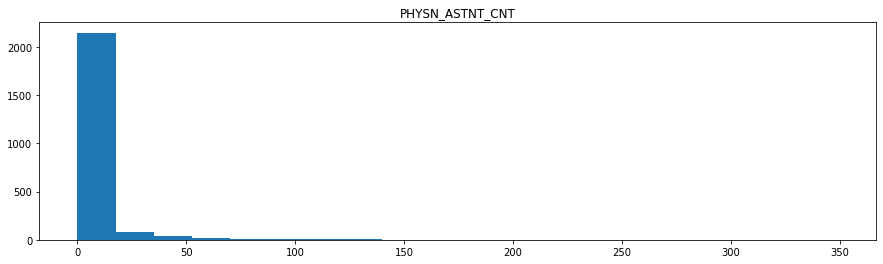

0.0 349.4


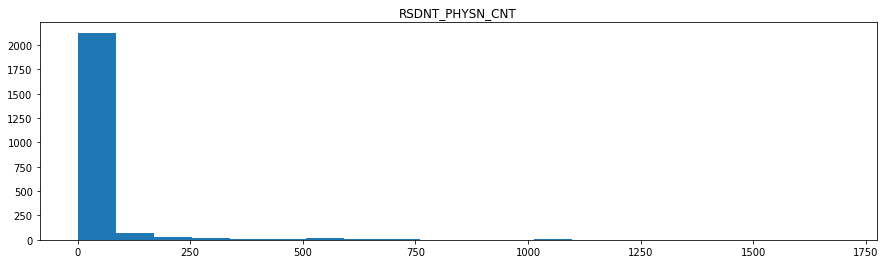

0.0 1689.38


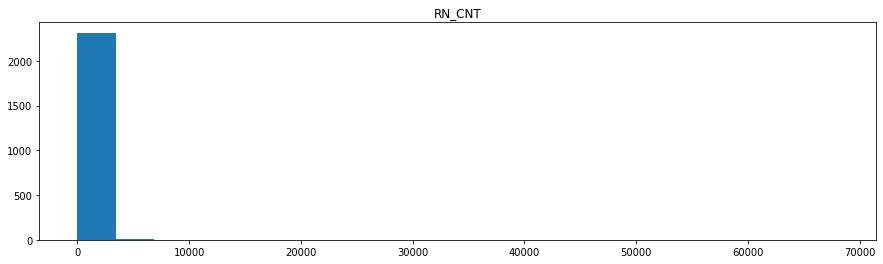

0.0 68094.4


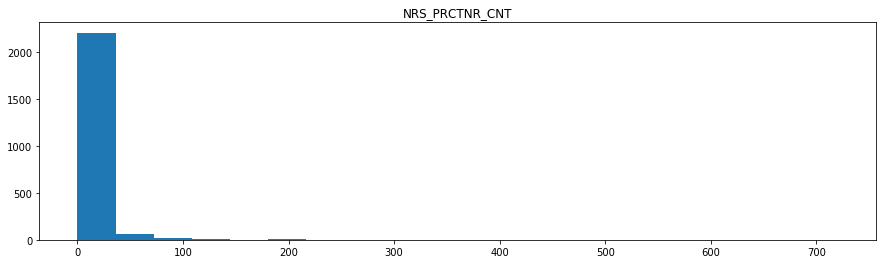

0.0 721.0


In [14]:
staff_counts = ['PHYSN_CNT','PHYSN_ASTNT_CNT','RSDNT_PHYSN_CNT','RN_CNT','NRS_PRCTNR_CNT']

for staff in staff_counts:
# pos2['PHYSN_CNT'].value_counts()
    plt.figure(figsize=(15,4))
    plt.hist(pos2[staff],bins=20)
    plt.title(staff)
    plt.show();
    print(pos2[staff].min(),pos2[staff].max())
#     pos2['PHYSN_CNT'].value_counts()

In [15]:
## Reformat and drop non-useful variables
pos2.rename({'CRTFD_BED_CNT':'bed_count'},axis=1,inplace=True)
pos2['rural'] = [1 if x == 'U' else 0 for x in pos2['CBSA_URBN_RRL_IND']]
pos2['med_school_affiliation'] = [1 if x != '4' else 0 for x in pos2['MDCL_SCHL_AFLTN_CD']]
pos2 = pos2.loc[:,['provider_id','bed_count','rural','med_school_affiliation']]

In [16]:
hosp2 = hosp.merge(pos2,on='provider_id')

In [17]:
hosp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2378 entries, 0 to 2377
Data columns (total 46 columns):
provider_id                                           2378 non-null object
start_date                                            2378 non-null object
end_date                                              2378 non-null object
avg_EXCESS                                            2378 non-null float64
avg_PRR                                               2378 non-null float64
avg_ERR                                               2378 non-null float64
PRR_imputed                                           2378 non-null int64
nod_imputed                                           2378 non-null int64
number_of_discharges                                  2378 non-null float64
number_of_readmissions                                2378 non-null float64
measure_name                                          2378 non-null int64
hospital_name                                         2378 non-nul

In [18]:
with open('hosp2.pickle', 'wb') as to_write:
    pickle.dump(hosp2, to_write)